In [609]:

import pandas as pd
import seaborn as sns
import numpy as np
from pylab import plot, show, rcParams, legend, bar, barh, xlabel, ylabel, title, xticks, yticks, axhline
from pandas import set_option, DataFrame
set_option("display.max_rows", 5)
import matplotlib.pyplot as plt




In [610]:
salaries = pd.read_csv("input/Salaries.csv", dtype='unicode')

In [611]:
salaries.shape

(148654, 13)

### Start analysing columns data

In [612]:
salaries.ix[salaries.EmployeeName=='Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN


There are 4 lines that do not bring any useful information, so drop it

In [613]:
salaries = salaries.ix[salaries.EmployeeName!='Not provided']

In [614]:
for columns in salaries.columns:
    if len(salaries[columns].unique())<10:
        print('Unique values for column ' + columns + ': ' + str(list(salaries[columns].unique())))

Unique values for column Year: ['2011', '2012', '2013', '2014']
Unique values for column Notes: [nan]
Unique values for column Agency: ['San Francisco']
Unique values for column Status: [nan, 'PT', 'FT']


Notes is null, so drop it

In [615]:
del salaries['Notes']

Agency is constant=='San Francisco', so drop it

In [616]:
del salaries['Agency']

In [617]:
basepay = salaries.ix[:,['Year', 'BasePay']]

In [618]:
basepay.shape

(148650, 2)

In [619]:
basepay.BasePay = basepay.BasePay.astype(float)

In [620]:
basepay

,Year,BasePay
0,2011,167411.18
1,2011,155966.02
...,...,...
148649,2014,0.00
148653,2014,0.00


In [621]:
basepay = DataFrame(basepay.groupby(by=['Year']).mean()).reset_index()


In [622]:
basepay

,Year,BasePay
0,2011,63595.956517
1,2012,65436.406857
2,2013,69630.030216
3,2014,66564.421924


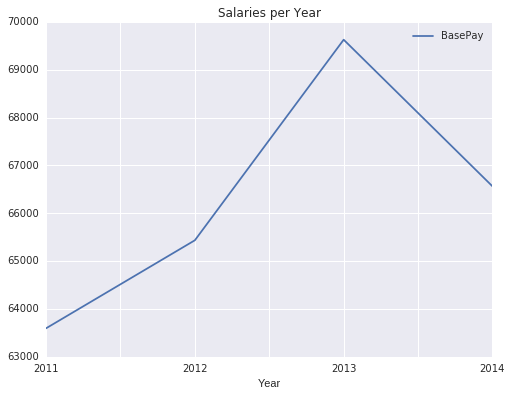

In [623]:
basepay.plot(x = 'Year', figsize=[8,6], legend=True, title="Salaries per Year")

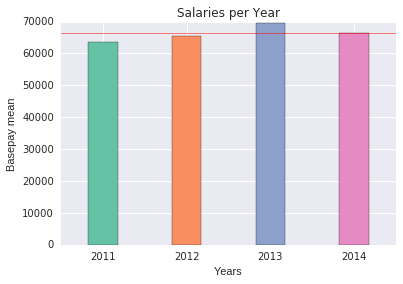

In [624]:
ind = np.arange(4)
width = 0.35
bar(ind, basepay.BasePay.unique().astype(int), width, color=sns.color_palette("Set2", 4), align='center')
xlabel('Years')
ylabel('Basepay mean')
title('Salaries per Year')
xticks(ind  , basepay.Year.unique())

axhline(basepay.BasePay.mean(), color='red', linewidth=0.5) #Mean


Considering all salaries, we can see that in 2014, their mean decreased

In [625]:
JobTitle = DataFrame(salaries['JobTitle'].value_counts())

In [626]:
JobTitle.reset_index(inplace=True)

In [627]:
JobTitle.columns=['JobTitle', 'CountTitle']

In [628]:
JobTitle

,JobTitle,CountTitle
0,Transit Operator,7036
1,Special Nurse,4389
...,...,...
2156,"TRACK MAINTENANCE SUPERINTENDENT,MUNICIPAL RAI...",1
2157,CHIEF ELECTRICAL INSPECTOR,1


### Added count of job title to be able to filter the most common/uncommon titles

In [629]:
salaries = salaries.merge(JobTitle, how='left', on='JobTitle')

In [630]:
salaries.TotalPayBenefits = salaries.TotalPayBenefits.astype(float)

In [631]:
salaries[salaries['TotalPayBenefits']==0.00]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.0,2011,NaN,47
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.0,2011,NaN,2388
...,...,...,...,...,...,...,...,...,...,...,...,...
148647,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.0,0.0,2014,PT,2418
148648,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.0,0.0,2014,PT,2418


### Clean TotalPayBenefits == 0, because they do not show any useful information

In [632]:
salaries = salaries.ix[salaries.TotalPayBenefits != 0.00]

In [633]:
salaries[salaries['TotalPayBenefits']<0.00]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,NaN,2421
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.0,-8.20,2013,NaN,2421
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.0,-33.89,2013,NaN,2421
148649,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,PT,63


### There are 4 workers with TotalPayBenefits < 0 . At this moment I see no use for them, so I will keep them separated from the rest of the dataset in a dataframe named negatives

In [634]:
negatives = salaries[salaries['TotalPayBenefits']<0.00]

In [635]:
salaries = salaries[salaries['TotalPayBenefits']>0.00]

In [636]:
salaries_by_title = salaries.ix[salaries.CountTitle>1000, ['Year', 'JobTitle', 'TotalPayBenefits']]
salaries_by_title = DataFrame(salaries_by_title.groupby(by=['JobTitle', 'Year']).mean()).reset_index() 

### Only 3 titles have salaries in 2011

In [637]:
salaries_by_title[salaries_by_title.Year=='2011']

,JobTitle,Year,TotalPayBenefits
36,REGISTERED NURSE,2011,106621.140689
43,SPECIAL NURSE,2011,31325.075942
50,TRANSIT OPERATOR,2011,61768.502560


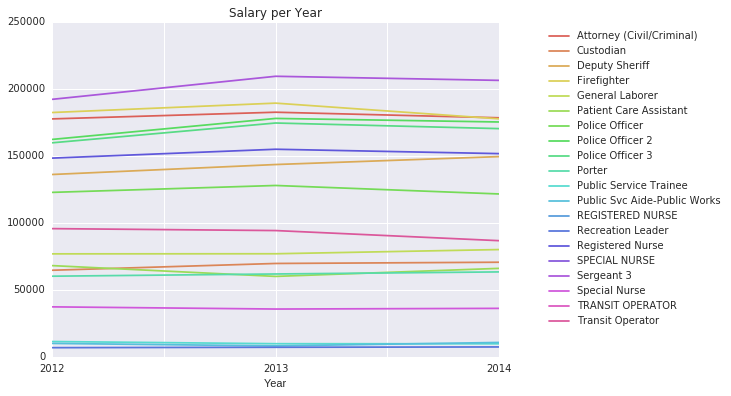

In [638]:
fig = plt.figure()
ax = plt.subplot(111)
color=iter(sns.color_palette("hls", 21))



for titles in salaries_by_title['JobTitle'].unique():
    c=next(color)
    salaries_by_title.ix[salaries_by_title['JobTitle']==titles].sort_values(by='Year')\
    .plot(x = 'Year', y= 'TotalPayBenefits', figsize=[8,6], legend=True, title="Salary per Year", label=titles, \
          ax=ax, c=c)
    plt.legend(bbox_to_anchor=(1.3, 0.9), bbox_transform=plt.gcf().transFigure)


### The graphic above does not show any relevant information, so let´s change the strategy

In [639]:
pivot = salaries.ix[:, ['Year', 'JobTitle', 'TotalPayBenefits']]
pivot = DataFrame(pivot.groupby(by=['JobTitle', 'Year']).mean()).reset_index() 
pivot = pivot.pivot( 'JobTitle', 'Year', 'TotalPayBenefits').reset_index()

In [640]:
pivot.columns=['JobTitle', 'Year2011', 'Year2012', 'Year2013', 'Year2014']

### Let's take a look at JobPositions with totalPayBenefits != 0 in 2011

In [641]:
pivot_2011 = pivot[pivot.Year2011.notnull()]
print('Titles with 2011 not null and 2012 null: '+ str(pivot_2011[pivot_2011.Year2012.notnull()].shape[0]))
print('Titles with 2011 not null and 2013 null: '+ str(pivot_2011[pivot_2011.Year2013.notnull()].shape[0]))
print('Titles with 2011 not null and 2014 null: '+ str(pivot_2011[pivot_2011.Year2014.notnull()].shape[0]))

Titles with 2011 not null and 2012 null: 0
Titles with 2011 not null and 2013 null: 0
Titles with 2011 not null and 2014 null: 0


### Based on the analysis above we can conclude that everyone that has salary in 2011 do not have any entry in the other years, so for salary increase by year they are not relevant

In [642]:
#Free some memory
del(pivot_2011)
#discard JobTitles that have salary in 2011
pivot = pivot[pivot.Year2011.isnull()]
#drop 2011 year coluumn
pivot.drop('Year2011', axis=1, inplace=True)

In [643]:
pivot

,JobTitle,Year2012,Year2013,Year2014
3,"ACPO,JuvP, Juv Prob (SFERS)",NaN,NaN,80266.370000
50,ASR Senior Office Specialist,87848.418824,94691.889524,87522.792727
...,...,...,...,...
2154,X-Ray Laboratory Aide,75778.306774,64605.606176,68754.120000
2156,Youth Comm Advisor,85774.390000,51344.310000,52011.190000


### Let's take a look at 2013 salary increase by title

In [644]:
# fill na with -9999
pivot.fillna(value=-9999, inplace=True)
for jobtitle in pivot['JobTitle']:
    sal2012 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2012'].values[0]
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    if ((sal2012!=-9999) & (sal2013!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2013'] = (((sal2013-sal2012)*100)/sal2012)

### Let´s create a DF with the top 5 best and top 5 worst salaries increase in 2013

In [645]:
bestworst2013 = pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').head(5)
bestworst2013 = pd.concat([bestworst2013, pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').tail(5)])

([<matplotlib.axis.YTick at 0x7f614fd76198>,
 <a list of 10 Text yticklabel objects>)

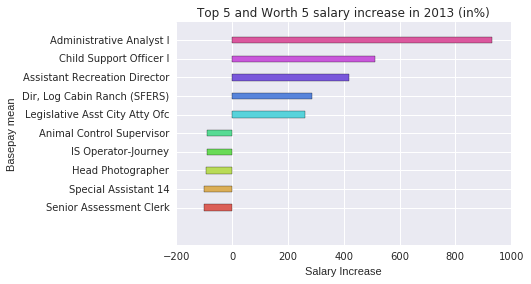

In [646]:
ind = np.arange(10)
height = 0.35
barh(ind, bestworst2013.Increase2013, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2013 (in%)')
yticks(ind , bestworst2013.JobTitle)
''

### Let's take a look at 2014 salary increase by title

In [647]:
for jobtitle in pivot['JobTitle']:
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    sal2014 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2014'].values[0]
    if ((sal2013!=-9999) & (sal2014!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2014'] = (((sal2014-sal2013)*100)/sal2013)

### Let's create a DF with the top 5 best and top 5 worst salaries increase in 2014

In [648]:
bestworst2014 = pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').head(5)
bestworst2014 = pd.concat([bestworst2014, pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').tail(5)])

'Top 5 and Worth 5 salary increase in 2014 (in%)'

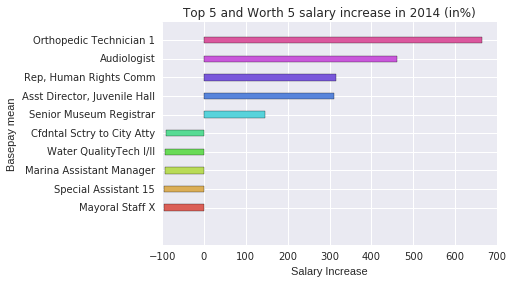

In [669]:
#ind = np.arange(10)
#height = 0.35
barh(ind, bestworst2014.Increase2014, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2014 (in%)')
yticks(ind , bestworst2014.JobTitle)
'Top 5 and Worth 5 salary increase in 2014 (in%)'

### Looks like Animal Control Supervisor is a outlier or a mistake. Let´s investigate

In [650]:
salaries.ix[salaries.JobTitle=="Animal Control Supervisor"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
68999,69000,Kent Cunningham,Animal Control Supervisor,6627.0,0.0,0.0,3279.22,6627.0,9906.22,2012,NaN,3
109811,109812,Kent A Cunningham,Animal Control Supervisor,662.7,0.0,25.4,294.41,688.1,982.51,2013,NaN,3
127013,127014,Denise J Bon Giovanni,Animal Control Supervisor,64701.00,1418.16,15232.55,28242.50,81351.71,109594.21,2014,FT,3


JobTitle Animal Control Supervisor has 3 entries, 1 per year and there is a big diference between the years because it is related to 3 different professionals. If we look a bit closer at Kent A Cunningham and Kent Cunningham, they look like the same person, but the BasePay in 2013 seems to have a problem in the decimal indicator. It´s 662.7 instead of 6627. The same analysis can bem made on Benefits. Apart from that, if we look at 2014 data, the values are 10x bigger than 2012. Denise J Bon Giovanni looks like an outlier. At this moment, let's eliminate this case and look at the results

In [651]:
pivot.drop('Increase2014', axis=1, inplace=True)
for jobtitle in pivot.ix[pivot.JobTitle != 'Animal Control Supervisor', 'JobTitle']:
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    sal2014 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2014'].values[0]
    if ((sal2013!=-9999) & (sal2014!= -9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2014'] = (((sal2014-sal2013)*100)/sal2013)

In [652]:
bestworst2014 = pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').head(5)
bestworst2014 = pd.concat([bestworst2014, pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').tail(5)])

In [660]:
barh(ind, bestworst2014.Increase2014, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2014 (in %)')
yticks(ind , bestworst2014.JobTitle)

SyntaxError: invalid syntax (<ipython-input-660-9119de6805c8>, line 5)

### The above graphic looks much better than the previous graphic for 2014

### Now, lets look at the frequency that thos jobs appear in our dataset

In [654]:
for jobtitle in bestworst2013.JobTitle:
    bestworst2013.ix[bestworst2013.JobTitle==jobtitle, 'CountTitle'] = \
    salaries.ix[salaries.JobTitle==jobtitle, 'CountTitle'].unique()
bestworst2013

,JobTitle,Year2012,Year2013,Year2014,Increase2013,CountTitle
1799,Senior Assessment Clerk,39149.185,20.730,-9999.0,-99.947049,3.0
1891,Special Assistant 14,36873.140,26.600,-9999.0,-99.927861,3.0
...,...,...,...,...,...,...
477,Child Support Officer I,9401.740,57454.305,-9999.0,511.102892,8.0
128,Administrative Analyst I,5907.330,60862.230,-9999.0,930.283224,2.0


In [655]:
for jobtitle in bestworst2014.JobTitle:
    bestworst2014.ix[bestworst2014.JobTitle==jobtitle, 'CountTitle'] = \
    salaries.ix[salaries.JobTitle==jobtitle, 'CountTitle'].unique()
bestworst2014

,JobTitle,Year2012,Year2013,Year2014,Increase2013,Increase2014,CountTitle
1220,Mayoral Staff X,103382.35,113508.140,4294.13,9.794506,-96.216897,4.0
1892,Special Assistant 15,152565.41,110888.760,5650.86,-27.317234,-94.904028,3.0
...,...,...,...,...,...,...,...
223,Audiologist,143247.78,22151.445,124333.97,-84.536273,461.290561,4.0
1297,Orthopedic Technician 1,15897.47,11631.370,88804.13,-26.835088,663.488136,3.0


By looking at the above dataframes and considering that we have more than 100k entries in the original dataset, the amount of data beeing considered in our analysis is not that big. As we don't know if the few entries for those jobtitles mean insignificant data or jobtitles rarity, we will continue the analysis

### Now let's look if some title is part from the best/worst 2013/2014 samples

In [656]:
best20132014 = pd.merge(bestworst2013, bestworst2014, how='inner', on='JobTitle')

In [657]:
best20132014.shape[0]

0

based on the above analysis there is no Jobtitlein the top/worst 5 that appears both in 2013 and 2014

### So, as we saw above, the increase/decrease on salaries are very big from one year to another . One of the reasons can be because the sample for that JobTitle is too small and the difference between the observations are too big. This can also be caused due to typing mistakes. To avoid that, we are going to do the same analysis above, but considering only the jobtitles that are more relevant (Appears more frequently in the dataset)

In [658]:
salaries.CountTitle.mean()

1118.795612972682

In [677]:
print('Different JobTitles: ' + str(len(salaries.ix[:, 'JobTitle'].unique())))

Different JobTitles: 2158


In [678]:
print("JobTitles below CountTitle's mean: " + str(len(salaries.ix[salaries.CountTitle<1118, 'JobTitle'].unique())))

JobTitles below CountTitle's mean: 2141


In [679]:
print("JobTitles above CountTitle's mean: " + str(len(salaries.ix[salaries.CountTitle>1118, 'JobTitle'].unique())))

JobTitles above CountTitle's mean: 17


In [680]:
print("JobTitles above CountTitle's mean/2: " + str(len(salaries.ix[salaries.CountTitle>559, 'JobTitle'].unique())))

JobTitles above CountTitle's mean/2: 47


### As the Jobtitle's distributions are very irregular, we are going to consider the ones that appear more than half mean

In [681]:
abovemean = salaries.ix[salaries.CountTitle>559]

### With our filtered dataset, we are going to generate the same graphics as above to investigate Salary Increase in 2013 and 2014

In [688]:
del(pivot)

In [697]:
pivot = abovemean.ix[:, ['Year', 'JobTitle', 'TotalPayBenefits']]
pivot = DataFrame(pivot.groupby(by=['JobTitle', 'Year']).mean()).reset_index() 
pivot = pivot.pivot( 'JobTitle', 'Year', 'TotalPayBenefits').reset_index()

pivot.columns=['JobTitle', 'Year2011', 'Year2012', 'Year2013', 'Year2014']

In [698]:
pivot_2011 = pivot[pivot.Year2011.notnull()]
print('Titles with 2011 not null and 2012 null: '+ str(pivot_2011[pivot_2011.Year2012.notnull()].shape[0]))
print('Titles with 2011 not null and 2013 null: '+ str(pivot_2011[pivot_2011.Year2013.notnull()].shape[0]))
print('Titles with 2011 not null and 2014 null: '+ str(pivot_2011[pivot_2011.Year2014.notnull()].shape[0]))
del(pivot_2011)

Titles with 2011 not null and 2012 null: 0
Titles with 2011 not null and 2013 null: 0
Titles with 2011 not null and 2014 null: 0


In [699]:
#discard JobTitles that have salary in 2011
pivot = pivot[pivot.Year2011.isnull()]
#drop 2011 year coluumn
pivot.drop('Year2011', axis=1, inplace=True)

### Let's take a look at 2013 salary increase by title

In [701]:
# fill na with -9999
pivot.fillna(value=-9999, inplace=True)
for jobtitle in pivot['JobTitle']:
    sal2012 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2012'].values[0]
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    if ((sal2012!=-9999) & (sal2013!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2013'] = (((sal2013-sal2012)*100)/sal2012)

In [702]:
bestworst2013 = pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').head(5)
bestworst2013 = pd.concat([bestworst2013, pivot.ix[pivot['Increase2013'].notnull()].sort_values('Increase2013').tail(5)])

'Top 5 and Worth 5 salary increase in 2013 (in%)'

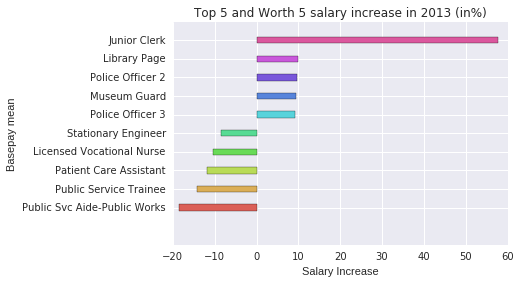

In [704]:
ind = np.arange(10)
height = 0.35
barh(ind, bestworst2013.Increase2013, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2013 (in%)')
yticks(ind , bestworst2013.JobTitle)
'Top 5 and Worth 5 salary increase in 2013 (in%)'

The above graphic looks great, but let's investigate Junior Clerk JobTitle because its behavior is a bit different than the others

In [706]:
abovemean.ix[abovemean.JobTitle=='Junior Clerk', "CountTitle"].unique()

array([596])

ok, we have 596 occurrences of the JobTitle. Let's check the maximun and minimum TotalPayBenefits

In [708]:
print("TotalPayBenefits min: " + str(abovemean.ix[abovemean.JobTitle=='Junior Clerk', "TotalPayBenefits"].min()))
print("TotalPayBenefits max: " + str(abovemean.ix[abovemean.JobTitle=='Junior Clerk', "TotalPayBenefits"].max()))

TotalPayBenefits min: 16.65
TotalPayBenefits max: 78578.23


There is a huge interval between min and max for this JobTitle. Let's continue investigating

''

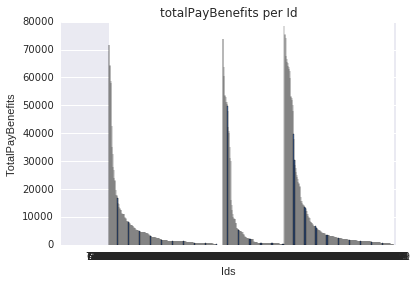

In [725]:
ind = np.arange(abovemean.ix[abovemean.JobTitle=='Junior Clerk', "TotalPayBenefits"].shape[0])
width = 0.1
bar(ind, abovemean.ix[abovemean.JobTitle=='Junior Clerk', "TotalPayBenefits"], width, align='center')
xlabel('Ids')
ylabel('TotalPayBenefits')
title('totalPayBenefits per Id')
xticks(ind  , abovemean.ix[abovemean.JobTitle=='Junior Clerk', "TotalPayBenefits"])
''


As we can see in the graphic, the behavior of the values for this sample is very inconstant. That's why we have such a big difference in the means when comparing 2012 to 2014

### Let's take a look at 2014 salary increase by title

In [721]:
for jobtitle in pivot['JobTitle']:
    sal2013 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2013'].values[0]
    sal2014 = pivot.ix[pivot['JobTitle']==jobtitle, 'Year2014'].values[0]
    if ((sal2013!=-9999) & (sal2014!=-9999)):
        pivot.ix[pivot['JobTitle']==jobtitle, 'Increase2014'] = (((sal2014-sal2013)*100)/sal2013)

### Let's create a DF with the top 5 best and top 5 worst salaries increase in 2014

In [722]:
bestworst2014 = pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').head(5)
bestworst2014 = pd.concat([bestworst2014, pivot.ix[pivot['Increase2014'].notnull()].sort_values('Increase2014').tail(5)])

'Top 5 and Worth 5 salary increase in 2014 (in%)'

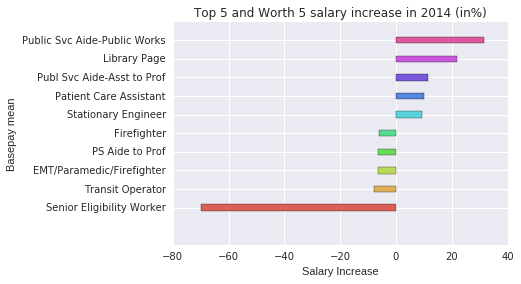

In [724]:
ind = np.arange(10)
height = 0.35
barh(ind, bestworst2014.Increase2014, height, color=sns.color_palette("hls", 10), align='center')
xlabel('Salary Increase')
ylabel('Basepay mean')
title('Top 5 and Worth 5 salary increase in 2014 (in%)')
yticks(ind , bestworst2014.JobTitle)
'Top 5 and Worth 5 salary increase in 2014 (in%)'

Here, the uncommon behavior comes from Senior Eligibility Workes, so let´s start looking at how the TotalPayBenefits variation is:

''

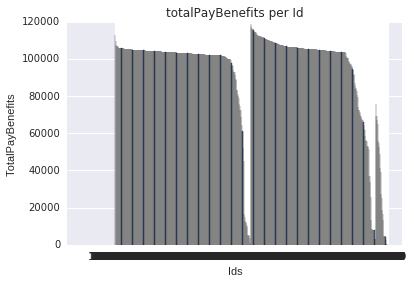

In [726]:
ind = np.arange(abovemean.ix[abovemean.JobTitle=='Senior Eligibility Worker', "TotalPayBenefits"].shape[0])
width = 0.1
bar(ind, abovemean.ix[abovemean.JobTitle=='Senior Eligibility Worker', "TotalPayBenefits"], width, align='center')
xlabel('Ids')
ylabel('TotalPayBenefits')
title('totalPayBenefits per Id')
xticks(ind  , abovemean.ix[abovemean.JobTitle=='Senior Eligibility Worker', "TotalPayBenefits"])
''

Here we have lot's of IDs with high numbers on TotalPayBenefits and some with low numbers

In [734]:
abovemean.ix[((abovemean.JobTitle=='Senior Eligibility Worker') & (abovemean['TotalPayBenefits']>90000)), 'Year'].value_counts()

2012    252
2013    218
Name: Year, dtype: int64

As we can see above, we do not have any TotalPayBenefit above 90000 in 2014, but we have 218 in 2013. That explains why we had such a big decrease for this JobTitle in 2014

### What if we try a different approach ? Instead of considering JobTitle as a group, let's group our dataset based on earning. We are going to create 2 groups: Group 1 will have the 25% poorer entries and group 2 will have the 25% richer entries. By doing that we will have to consider 2011 as our base year and we will analyse the mobility of these groups in 2013 and 2014. After this, we will be able to answer questions like: Did the lowest paid people get richer or poorer? The same for the highest payd group. We will also be able to analyse the range of earnings

In [865]:
d = dict()
d['year'] = []
d['poor_min'] = []
d['poor_mean'] = []
d['poor_max'] = []
d['poor_range'] = []
d['rich_min'] = []
d['rich_mean'] = []
d['rich_max'] = []
d['rich_range'] = []
for year in ['2011', '2012', '2013', '2014']:
    d['year'].append(year)
    poor_min = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().head(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).min()
    d['poor_min'].append(poor_min)
    #print('Poor min ' + year + ' : '+ str(poor_min))
    poor_mean = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().head(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).mean()
    d['poor_mean'].append(poor_mean)
    #print('Poor mean ' + year + ' : '+ str(poor_mean))
    poor_max = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().head(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).max()
    d['poor_max'].append(poor_max)
    #print('Poor max ' + year + ' : '+ str(poor_max))
    poor_range = poor_max - poor_min
    d['poor_range'].append(poor_range)
    #print('Poor range ' + year + ' : '+ str(poor_range))
    rich_min = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().tail(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).min()
    d['rich_min'].append(rich_min)
    #print('Rich min ' + year + ' : '+ str(rich_min))
    rich_mean = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().tail(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).mean()
    d['rich_mean'].append(rich_mean)
    #print('Rich mean ' + year + ' : '+ str(rich_mean))
    rich_max = salaries.ix[salaries['Year']==year, 'TotalPayBenefits'].sort_values().tail(int(salaries.ix[salaries['Year']==year].shape[0]*0.25)).max()
    d['rich_max'].append(rich_max)
    #print('Rich max ' + year + ' : '+ str(rich_max))
    rich_range = rich_max - rich_min
    d['rich_range'].append(rich_range)
    #print('Rich range ' + year + ' : '+ str(rich_range))
    

In [866]:
d = pd.DataFrame(d)

''

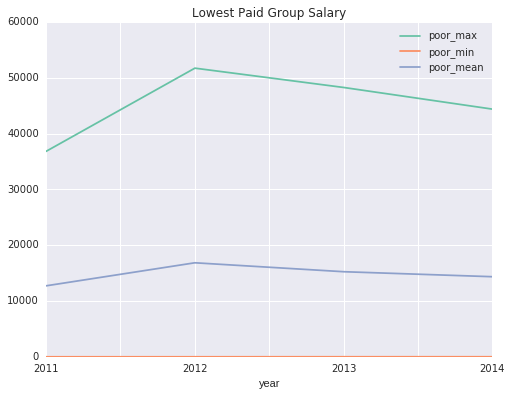

In [884]:
fig = plt.figure()
ax = plt.subplot(111)
color=iter(sns.color_palette("Set2", 5))
c=next(color)
d.ix[:, ['poor_max', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Lowest Paid Group Salary", ax=ax, c=c)
c=next(color)
d.ix[:, ['poor_min', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Lowest Paid Group Salary", ax=ax, c=c)
c=next(color)
d.ix[:, ['poor_mean', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Lowest Paid Group Salary", ax=ax, c=c)
''

From the graphic above we can conclude that the lowest paid group is getting even poorer. After 2012 their Max and mean Salary decreased, showing that they are earning less money

''

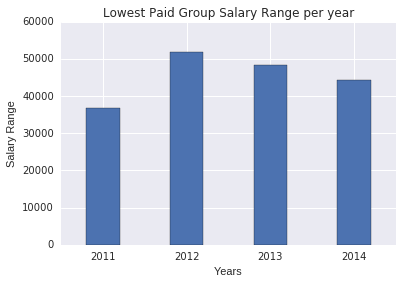

In [885]:
ind = np.arange(4)
width = 0.4
bar(ind, d.ix[:, "poor_range"], width, align='center')
xlabel('Years')
ylabel('Salary Range')
title('Lowest Paid Group Salary Range per year')
xticks(ind  , d.ix[:, "year"])
''

''

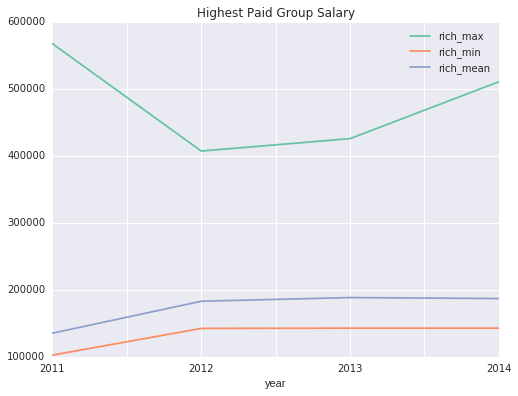

In [887]:
fig = plt.figure()
ax = plt.subplot(111)
color=iter(sns.color_palette("Set2", 5))
c=next(color)
d.ix[:, ['rich_max', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Highest Paid Group Salary", ax=ax, c=c)
c=next(color)
d.ix[:, ['rich_min', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Highest Paid Group Salary", ax=ax, c=c)
c=next(color)
d.ix[:, ['rich_mean', 'year']].plot(x='year', figsize=[8,6], legend=True, title="Highest Paid Group Salary", ax=ax, c=c)
''

Although the Max Salary for the 25% richer people decreased from 2011 to 2012, ther mean increased, showing us that this group got richer. After 2012, its max salary increased, but the mean stayed almost stable, showing that they did not get richer or poorer

''

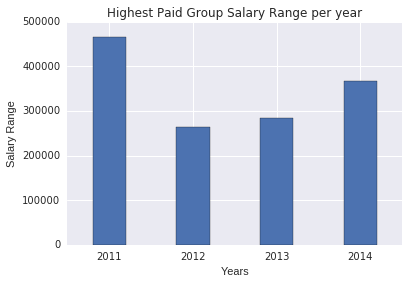

In [888]:
ind = np.arange(4)
width = 0.4
bar(ind, d.ix[:, "rich_range"], width, align='center')
xlabel('Years')
ylabel('Salary Range')
title('Highest Paid Group Salary Range per year')
xticks(ind  , d.ix[:, "year"])
''

In [873]:
for year in ['2012', '2013', '2014']:
    sal_curr = d.ix[d.year==year, 'poor_mean'].values[0]
    sal_prev = d.ix[d.year==(str(int(year)-1)), 'poor_mean'].values[0]
    MeanInc = ((sal_curr-sal_prev)*100)/sal_prev
    d.ix[d.year==year, 'PoorMeanInc'] = MeanInc
    
    sal_curr = d.ix[d.year==year, 'rich_mean'].values[0]
    sal_prev = d.ix[d.year==(str(int(year)-1)), 'rich_mean'].values[0]
    MeanInc = ((sal_curr-sal_prev)*100)/sal_prev
    d.ix[d.year==year, 'RichMeanInc'] = MeanInc

''

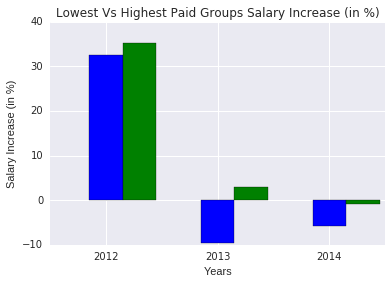

In [889]:
fig, ax = plt.subplots()
ind = np.arange(3)
width = 0.3
bar(ind, d.ix[d['PoorMeanInc'].notnull(), "PoorMeanInc"],  width, align='center', color='blue')
bar(ind+width, d.ix[d['RichMeanInc'].notnull(), "RichMeanInc"], width, align='center', color='green')
xlabel('Years')
ylabel('Salary Increase (in %)')
title('Lowest Vs Highest Paid Groups Salary Increase (in %)')
xticks(ind  , d.ix[:, d.ix[d['PoorMeanInc'].notnull(), 'year']])
''

### To conclude, the graphic above shows the increase/decrease in salary's mean for our 2 groups. It´s clean that in 2012 they increased alot. In 2013, pooerer people got even poorer. On the other hand, richer people, got richer. In 2014, both groups got poorer, but poorer group suffered more from this. 

In [992]:
from ggplot import *

In [1002]:
titles = list(abovemean.drop_duplicates('JobTitle').sort_values('CountTitle').tail(30).JobTitle)

In [1003]:
plotter = abovemean.ix[abovemean['JobTitle'].isin(titles)]

In [995]:
#ggplot is throwing a warning on a deprecated command, so, I'm suppressing it
import warnings
warnings.filterwarnings("ignore")

### Histogram with the 30 more frequent JobTitles distribution

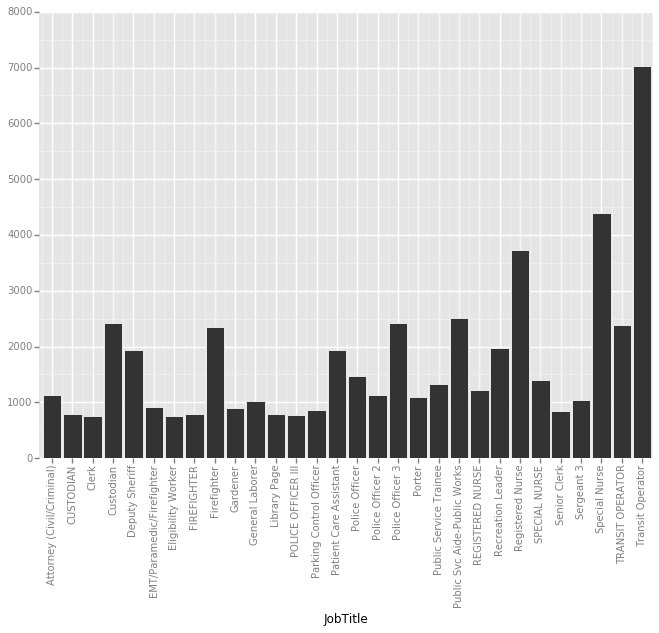

<ggplot: (8753275724492)>

In [1012]:
ggplot(plotter, aes(x='JobTitle')) + geom_histogram() + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

### Histogram with TotalPayBenefits distribution

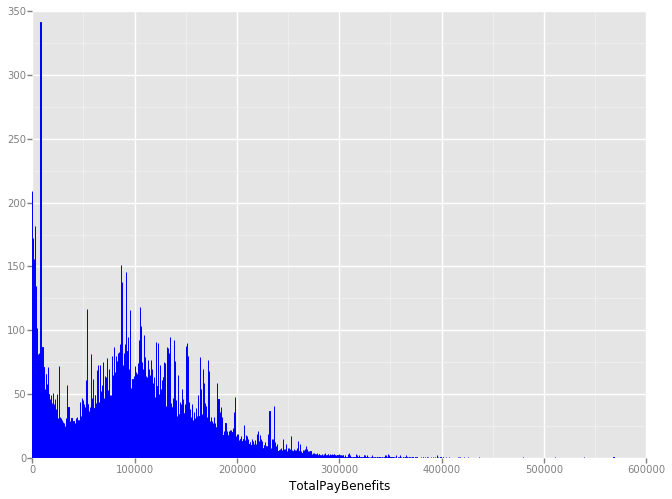

<ggplot: (8753298613028)>

In [989]:
ggplot(salaries, aes(x='TotalPayBenefits')) + geom_histogram(binwidth=50, colour='blue')

### Now let's take a look at the 5 highest payments

In [1013]:
salaries.sort_values('TotalPayBenefits').tail(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,CountTitle
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.7,436224.36,2014,PT,1
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,FT,12
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,PT,21
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,37
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,2


### Deputy Chief 3 called my attention because BasePay is relativelly low, but his TotalPayBenefit is very high. I will take a look at the BasePayBenefits mean for this Jobtitle

In [1017]:
salaries.ix[salaries.JobTitle=='Deputy Chief 3', 'TotalPayBenefits'].mean()

324670.49095238099

### As we can see, the mean is very far away from the max Total PayBenefit for this Jobtitle. With this we can conclude that the TotalPayBenefits for this jobTitle is not so high, but there is a person in this JobTitle that receives high amounts of money

### Now an other question came to my mind. Considering a sample with the 1% higher paid people, which JobTitles will be more frequent ?

In [1061]:
higher_paid = salaries.sort_values('TotalPayBenefits').tail(int((salaries.shape[0]*0.01)))

In [1062]:
len(higher_paid.JobTitle.unique())

121

As we have 121 different Jobtitles in this sample, I will filter the more frequent ones in order to be able to do a  good plot

First I will count the occurrences of each JobTitle in our sample

In [1063]:
filtered = pd.DataFrame(higher_paid.JobTitle.value_counts()).reset_index()
filtered.columns=['JobTitle', 'Count']

Now I will create a list with the JobTitles that appear more than 5 times in our Sample

In [1064]:
top_pay = list(filtered.ix[filtered.Count>5, "JobTitle"])

### Below we have a graphic with the more frequent JobTitles that are in our sample of the 1% highest paid people

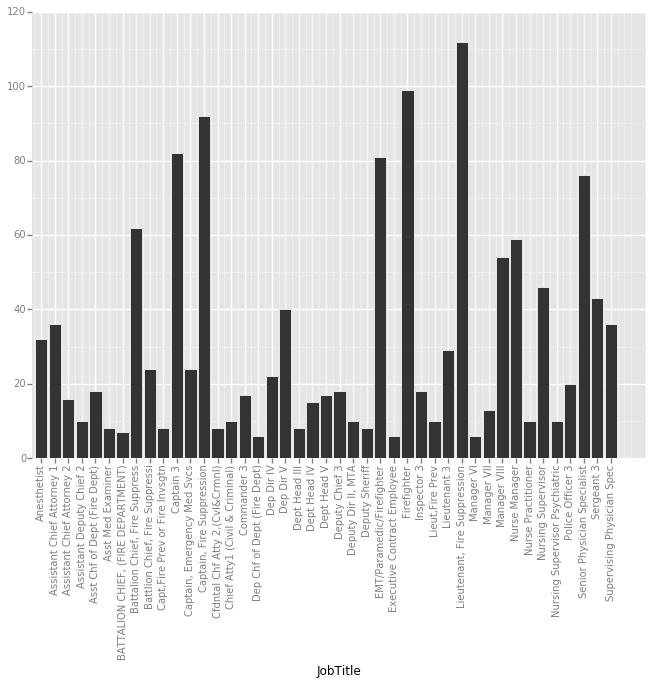

<ggplot: (8753271818160)>

In [1065]:
ggplot(higher_paid.ix[higher_paid['JobTitle'].isin(top_pay)], aes(x='JobTitle')) + geom_histogram() + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

### The graphic above shows us the highest paid JobTitles based on TotalPayBenefits. Now let's analyse the results if we use BasePay instead

In [1066]:
higher_paid = salaries.sort_values('BasePay').tail(int((salaries.shape[0]*0.01)))

In [1067]:
len(higher_paid.JobTitle.unique())

317

In [1068]:
filtered = pd.DataFrame(higher_paid.JobTitle.value_counts()).reset_index()
filtered.columns=['JobTitle', 'Count']

In [1069]:
top_base_pay = list(filtered.ix[filtered.Count>5, "JobTitle"])

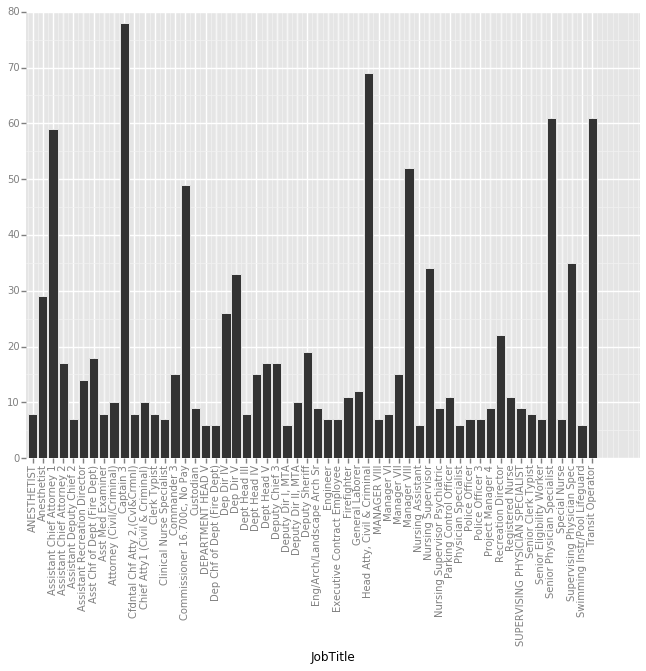

<ggplot: (-9223363283582996245)>

In [1070]:
ggplot(higher_paid.ix[higher_paid['JobTitle'].isin(top_base_pay)], aes(x='JobTitle')) + geom_histogram() + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

### And below we have a list of the JobTitles that appear in both graphics. 

In [1072]:
set(top_pay) & set(top_base_pay)

{'Anesthetist',
 'Assistant Chief Attorney 1',
 'Assistant Chief Attorney 2',
 'Assistant Deputy Chief 2',
 'Asst Chf of Dept (Fire Dept)',
 'Asst Med Examiner',
 'Captain 3',
 'Cfdntal Chf Atty 2,(Cvl&Crmnl)',
 'Chief Atty1 (Civil & Criminal)',
 'Commander 3',
 'Dep Chf of Dept (Fire Dept)',
 'Dep Dir IV',
 'Dep Dir V',
 'Dept Head III',
 'Dept Head IV',
 'Dept Head V',
 'Deputy Chief 3',
 'Deputy Dir II, MTA',
 'Deputy Sheriff',
 'Executive Contract Employee',
 'Firefighter',
 'Manager VI',
 'Manager VII',
 'Manager VIII',
 'Nursing Supervisor',
 'Nursing Supervisor Psychiatric',
 'Police Officer 3',
 'Senior Physician Specialist',
 'Supervising Physician Spec'}